# El dataset de MNIST

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MINIST_data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MINIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MINIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MINIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MINIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.p

In [5]:
len(mnist.train.images)

55000

In [6]:

len(mnist.test.images)

10000

In [8]:
# Las imagenes de este data set vienen en formato unidimesional, hay que cambiarlo a tipo foto
im_temp = mnist.train.images[0]
im_temp

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
from skimage import io
import numpy as np

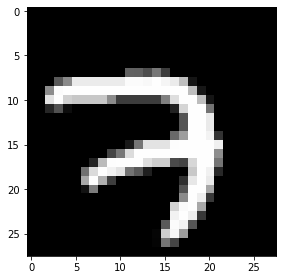

In [11]:
# la cambiamos al formato foto
io.imshow(np.reshape(im_temp, (28,28)))

# en lugar de pensar en una matriz de 28x28, podemos pensar en un array aplanado de 28x28

In [13]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Una red neuronal con Tensor Flow - v1
* Las imagenes de entrenamiento del MNISt viven en un espacio vectorial de dimension 784.
* El dataset se puede pensar como 55000 filas y 784 columnas(28*28), lo podemos pensar como un dataset, cada una de las entradas del tensor es un pixel con intensidad entre 0 y 1
* cada dato del dataset es un numero real entre 0 y 1
* one_hot = es un vector que es 0 en la gran mayoria de las dimensiones y 1 en solo una de las dimensiones

Y = softmax(w * x + b), donde w es la matriz de pesos, y b es la desviacion


In [15]:
dim_input = 784
n_categories = 10

In [14]:
# Tensorflow en lugar de ejecutar una operacion unica independiente fuera de pyton, muy pesada

# Tensorflow lo que hace es describir un grafo interconectado de operaciones que se ejecutan todas y cada una de ellas fuera de python
# esto para evitar hacer operaciones fuera y devolver a python y asi
# cuando arranca una sesion y se elevoran los calculos y luego finaliza la sesion, las operaciones se realizan fuera de python
# para describir las operaciones utlizamos los placeholder

# con el None le decimos que pudiera tener cualquier longitud
x = tf.placeholder(tf.float32, [None, dim_input])





In [16]:
# tendremos  tantas filas como posibles categorias a clasificar
# y el numero de filas debera ser igual al mimsmo numero de columnas del vector x
# nos inicializamos en 0 como punto de partida
w = tf.Variable(tf.zeros([dim_input,n_categories]))

b = tf.Variable(tf.zeros([n_categories]))

# una variable es un tensor que se puede modificar por la propia red neuronal

# la salida en esta caso seran vectores de espacio vectorial 10


In [18]:
# matmul, multiplicacion de matrices
# lo colocamos al reves para que puedan multiplicarse(numero de columnas del primero igual al numero de filas del segundo)
softmax_args = tf.matmul(x,w) + b
y_hat= tf.nn.softmax(softmax_args)

### Ahora tensorflow esta preparado para ejecutar lo que le hemos indicado 

#### Entrenamiento de una red neuronal
* Loss/Cost<- objetivo minimizar las perdidas

In [19]:
from IPython.display import display, Math, Latex

**Una forma muy comun de hacer la clasificacion es determinar la funcion de perdidas a travez de la entropia cruzada**

esta surge de pensar en el como se comprimen los codigos en teoria de la informacion sin sufrir perdidas




In [28]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i Log(\hat{y_i})"))

<IPython.core.display.Math object>

tipicamente no definimos que es un modelo bueno, definimos que es lo que hace a un modelo malo, el coste o perdida(loss), representa como de lejos
esta la salida que nosotros deseamos, y lo que hacemos es minimizar dicho error

La entropia cruzada mide como de ineficiente son nuestras predicciones al describir la realidad

In [29]:
# el none significa que puede ser cualquier cantidad de datos
y_ = tf.placeholder(tf.float32, [None, 10])


In [30]:
# tf.log en este caso calcula el logaritmo de cada uno de los elementos de las predicciones
# luego multiplicamos por el valor original, la funcion reduce_sum, sumara todos los elementos
# solo de la segunda dimension [1] y el reduce_mean, calculara el promedio de todas las muestras del dataset
cross_entropy = tf.reduce_mean( - tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices = [1]))

# tambien podemos usar
#tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_), este es mas eficiente


In [31]:
# Retropropagacion
# le pedimos a tensorflow la entropia cruzada(el coste), utilizando el gradiente descendiente
# con ratio de aprendisaje de 0.5
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# tensorflow a;adira nuevas operaciones al grafo que implementaran propagacion hacia atras y gradiente descendiente
# de modo que en cada operacion, se ejecutara un paso con gradiente descendiente con una modificacion adicional de los pesos y el bias que reduzca la perdida
# esto indica el como sera entrenada la red neuronal

In [32]:
session = tf.InteractiveSession()

In [34]:
# inicializacion global
tf.global_variables_initializer().run()

In [36]:
# En cada etapa del bucle tomamos una muestra de 100 datos aleatorios del dataset
# luego ejecutamos la funcion que hemos definido sobre las imagenes que son sustutidas como placeholder de la variable x 
#batch_y es la muestra de 100 etiquetas correspondientes a las imagenes
# cuando utilizamos peque;os batches aleatorios del dataset se llama hacer un entramiento estocaistico, en lugar de hacerlo de golpe
# En nuestro caso es un gradiente descendiente estocaistico, lo hacemos asi en lugar en lugar de usar todo el dataset
# para reducir el costo computacional, es como una crossvalidation
for _ in range(5000):
    batch_x, batch_y = mnist.train.next_batch(100)
    session.run(train_step, feed_dict ={
        x: batch_x, y_: batch_y
    })

# Evaluando la red neuronal

In [41]:

# Esto me retornara una lista de booleanos, basicamente estamos comparando las prediciones con las reales
# argmax me devuelve la clase mas probable
correct_predictions = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_,1))

In [42]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [45]:
print(session.run(accuracy, feed_dict={
    x:mnist.test.images,
    y_:mnist.test.labels
}))

0.9202
